<a href="https://colab.research.google.com/github/Rajarshi-11/Pesticide-Recommendation-System-Using-Improved-Deep-Learning-Technique-/blob/main/MINOR_PROJECT_(ML_IN_AGRICULTURE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#MINOR PROJECT...
#Pest's Identification..
#Pest's Diseases Detetction...
#Pesticides Recommendation...


! pip install kaggle   #install kaggle  #RM...

In [ ]:
from google.colab import drive    #drive acess through kaggle  #RM...
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle   #create kaggle directory  #RM...

In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/MINOR\ PROJECT\ \(ML\ IN\ AGRICULTURE\)/kaggle.json ~/.kaggle/kaggle.json   #RM...


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json       #giving permision to that directory   #RM...

In [ ]:
! kaggle datasets download -d simranvolunesia/pest-dataset      #downloading dataset for pests    #RM...


Dataset URL: https://www.kaggle.com/datasets/simranvolunesia/pest-dataset
License(s): CC0-1.0


In [ ]:
# import shutil

# # Replace 'folder_name' with the path to the folder you want to delete
# shutil.rmtree('/content/DATA2')

In [ ]:
!apt-get install unrar -y
# !unzip /content/pest-dataset.zipyes


!unrar x /content/pest-dataset.zip   #unzipping dataset

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

/content/pest-dataset.zip is not RAR archive
No files to extract


In [ ]:
#  #install rar   #RM..

# !apt-get install unrar -y
# !unrar x /content/pest-dataset.zip


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

/content/pest-dataset.zip is not RAR archive
No files to extract


In [ ]:
!unrar x /content/diseases.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/diseases.rar

Creating    DATA2                                                     OK
Creating    DATA2/aphids anthracnose                                  OK
Extracting  DATA2/aphids anthracnose/anthracnose10_.jpg                    0%  OK 
Extracting  DATA2/aphids anthracnose/anthracnose11_.jpg                    0%  OK 
Extracting  DATA2/aphids anthracnose/anthracnose18_.jpg                    0%  OK 
Extracting  DATA2/aphids anthracnose/anthracnose19_.jpg                    1%  OK 
Extracting  DATA2/aphids anthracnose/anthracnose20_.jpg                    1%  OK 
Extracting  DATA2/aphids anthracnose/anthracnose21_.jpg                    2%  OK 
Extracting  DATA2/aphids anthracnose/anthracnose22_.jpg                    2%  OK 
Extracting  DATA2/aphids anthracnose/anthracnose23_.jpg                    3%  OK 
Ext

In [ ]:
#counting the number of img data present in our Dataset (train & test)...
#RM...

import os

def total_files(folder_path):
    count = 0
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            count += 1
    return count


test_files = "/content/pest/test"
print(total_files(test_files))

train_files = "/content/pest/train"
print(total_files(train_files))


dis_files="/content/DATA2"
print(total_files(dis_files))



450
2700
494


In [ ]:
#Data Preprocessing...
#RM...


import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load and preprocess the image
from PIL import Image
import IPython.display as display

#Training Image preprocessing...
#PEST(Train)
training_set = tf.keras.utils.image_dataset_from_directory(
       '/content/pest/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


#Validation Image Preprocessing (Checking if all img are working or does have error or not)....
#Diseases..
#RM..


validation_set = tf.keras.utils.image_dataset_from_directory(
         '/content/DATA2',
      labels="inferred",
      label_mode="categorical",
      class_names=None,
      color_mode="rgb",
      batch_size=32,
      image_size=(128, 128),
      shuffle=True,
      seed=None,
      validation_split=None,
      subset=None,
      interpolation="bilinear",
      follow_links=False,
      crop_to_aspect_ratio=False
  )


Found 2700 files belonging to 9 classes.
Found 494 files belonging to 9 classes.


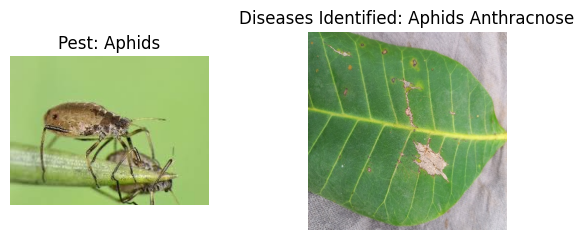

In [ ]:
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import display
from PIL import Image

image_path = '/content/pest/train/aphids/jpg_1 - Copy (2).jpg'
image_dis_path = "/content/DATA2/aphids anthracnose/anthracnose18_.jpg"

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)  # Adjust wspace for horizontal spacing

# Display the first image in the first subplot
with open(image_path, 'rb') as f:
    image1 = Image.open(f)
    ax1.imshow(image1)
    ax1.axis('off')
    ax1.set_title("Pest: Aphids")  # Turn off axis ticks and labels

# Display the second image in the second subplot
with open(image_dis_path, 'rb') as f:
    image2 = Image.open(f)
    ax2.imshow(image2)
    ax2.axis('off')
    ax2.set_title("Diseases Identified: Aphids Anthracnose")  # Turn off axis ticks and labels

# Show the plot
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input


# #1) Define the model Convolutional Neural Network (CNN)...
#RM..

input_tensor = Input(shape=(128, 128, 3))

# Define the model..

model = Sequential()

#Building Convolutional Layer...


model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1500, activation='relu'))

#output_Layer...
model.add(Dense(9, activation='softmax'))

# RM...


# #2) Defining the model Dense Convolutional Network (DenseNet121) ...
# #RM...

# model = tf.keras.applications.DenseNet121(
#     include_top=True,
#     weights=None,  # Randomly initialize weights
#     input_tensor=None,
#     input_shape=(128, 128, 3),  # Set the input shape to (128, 128, 3)
#     pooling=None,
#     classes=9,
# )





# Compiling the model...
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# #-------------------------------------------------------------------------------------------------------------------------------------------------------------#



# #Training the model to get Accuracy & its working how much...

training_history = model.fit(x=training_set,validation_data=validation_set,epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │      86,401,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │          13,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,434,401 (329.72 MB)

 Trainable params: 86,434,401 (329.72 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.4322 - loss: 504.1559 - val_accuracy: 0.3441 - val_loss: 3.7829
Epoch 2/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.9663 - loss: 0.1293 - val_accuracy: 0.3785 - val_loss: 3.4496
Epoch 3/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 265s 3s/step - accuracy: 0.9733 - loss: 0.1387 - val_accuracy: 0.3968 - val_loss: 6.8668
Epoch 4/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 226s 3s/step - accuracy: 0.9699 - loss: 0.1809 - val_accuracy: 0.3927 - val_loss: 4.2231
Epoch 5/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 229s 3s/step - accuracy: 0.9482 - loss: 0.2304 - val_accuracy: 0.3866 - val_loss: 6.2809


In [ ]:
# import tensorflow as tf
# import numpy as np
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
# from tensorflow.keras.models import Model

# # 1. Define the Feature Extractor (same as before)
# def create_feature_extractor(input_shape):
#   inputs = Input(shape=input_shape)
#   x = Conv2D(32, (3, 3), activation='relu')(inputs)
#   x = MaxPooling2D((2, 2))(x)
#   x = Conv2D(64, (3, 3), activation='relu')(x)
#   x = MaxPooling2D((2, 2))(x)
#   x = Flatten()(x)
#   embeddings = Dense(128)(x)
#   return Model(inputs=inputs, outputs=embeddings)

# # 2. Modified Prototypical Network
# def prototypical_network_without_separate_embeddings(input_shape, num_classes):
#   feature_extractor = create_feature_extractor(input_shape)

#   # Single input for all images (support and query)
#   all_images = Input(shape=(None,) + input_shape, name="AllImages")
#   all_labels = Input(shape=(None,), dtype=tf.int32, name="AllLabels")

#   # Get embeddings for all images
#   all_embeddings = feature_extractor(all_images)

#   # Calculate prototypes
#   prototypes = Lambda(lambda x: tf.stack([
#       tf.reduce_mean(tf.boolean_mask(x[0], tf.equal(x[1], c)), axis=0)
#       for c in range(num_classes)
#   ]))([all_embeddings, all_labels])

#   # Calculate distances between all embeddings and prototypes
#   distances = Lambda(lambda x: tf.norm(tf.expand_dims(x[0], axis=1) - x[1], axis=2))(
#       [all_embeddings, prototypes]
#   )

#   outputs = tf.keras.layers.Softmax()(distances)

#   return Model(inputs=[all_images, all_labels], outputs=outputs)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.applications import ResNet50
# import numpy as np

# # Define the embedding model
# def create_embedding_model(input_shape=(128, 128, 3)):
#     # Use ResNet50 as the backbone for feature extraction
#     base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
#     base_model.trainable = False  # Freeze the base model

#     # Add a custom top layer for our task
#     x = layers.GlobalAveragePooling2D()(base_model.output)
#     x = layers.Dense(256, activation='relu')(x)
#     embedding_model = models.Model(inputs=base_model.input, outputs=x)
#     return embedding_model

# # Define Prototypical Network for few-shot classification
# def create_prototypical_network(input_shape=(128, 128, 3)):
#     embedding_model = create_embedding_model(input_shape)

#     input_a = layers.Input(shape=input_shape)
#     input_b = layers.Input(shape=input_shape)

#     # Generate embeddings for both images
#     embedding_a = embedding_model(input_a)
#     embedding_b = embedding_model(input_b)

#     # Calculate the Euclidean distance between the embeddings
#     distance = layers.Lambda(lambda tensors: tf.norm(tensors[0] - tensors[1], axis=-1))(embedding_a, embedding_b)

#     model = models.Model(inputs=[input_a, input_b], outputs=distance)
#     return model

# # Create the prototypical network model
# model = create_prototypical_network()

# # Compile the model with a suitable loss function (e.g., contrastive loss or triplet loss)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Summarize the model architecture
# model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_71            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_72            │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_28             │ (None, 256)            │     24,112,256 │ input_layer_71[0][0],  │
│ (Functional)              │                        │                │ input_layer_72[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ ()                     │              0 │ functional_28[0][0],   │
│                           │                        │                │ functional_28[1][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 24,112,256 (91.98 MB)

 Trainable params: 524,544 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# # Assuming training_set is your training dataset loaded with images and their labels
# # You would replace this with the actual data loader
# # For example, if you have a simple dataset, the data generator needs to be passed to the model.

# # Create the prototypical network model
# model = create_prototypical_network()

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Assuming you have a proper data generator as shown earlier
# history = model.fit(fewshot_data_generator(training_set), epochs=15, steps_per_epoch=100)

# # Evaluate the model
# val_history = model.evaluate(fewshot_data_generator(validation_set))


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
# def fewshot_data_generator(training_set, batch_size=32, n_way=5, k_shot=5, image_size=(128, 128)):
#     while True:
#         # Randomly select n_way classes
#         selected_classes = random.sample(training_set.classes, n_way)

#         support_images = []
#         query_images = []
#         labels = []

#         for cls in selected_classes:
#             # Select k_shot samples for each class
#             class_images = [img for img in training_set.image_paths if img.startswith(cls)]
#             support_samples = random.sample(class_images, k_shot)

#             # Add support images to the support set
#             for support_img in support_samples:
#                 img = image.load_img(support_img, target_size=image_size)
#                 img_array = image.img_to_array(img) / 255.0  # Normalize image
#                 support_images.append(img_array)
#                 labels.append(cls)

#             # Randomly select one image from the same class for the query
#             query_img = random.choice(support_samples)
#             img = image.load_img(query_img, target_size=image_size)
#             img_array = image.img_to_array(img) / 255.0  # Normalize image
#             query_images.append(img_array)

#         # Convert to NumPy arrays
#         support_images = np.array(support_images)
#         query_images = np.array(query_images)

#         # Convert labels to a one-hot encoded format (optional depending on how you use it)
#         labels = np.array(labels)

#         # Ensure no None values are returned
#         if support_images is None or query_images is None or labels is None:
#             print("Data generator is returning None, check the data processing.")
#             continue

#         yield [support_images, query_images], labels


In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Set up ImageDataGenerator for loading and augmenting images
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

# # Update the directory paths
# train_dir = '/content/pest/train'  # Points to the parent directory for training
# val_dir = '/content/pest/test'    # Points to the parent directory for validation

# # Flow from directory for training
# training_set = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical'
# )

# # Flow from directory for validation
# validation_set = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical'
# )

# # Verify the data is loaded correctly
# print(f"Training classes: {training_set.class_indices}")
# print(f"Validation classes: {validation_set.class_indices}")

Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
Training classes: {'aphids': 0, 'armyworm': 1, 'beetle': 2, 'bollworm': 3, 'grasshopper': 4, 'mites': 5, 'mosquito': 6, 'sawfly': 7, 'stem_borer': 8}
Validation classes: {'aphids': 0, 'armyworm': 1, 'beetle': 2, 'bollworm': 3, 'grasshopper': 4, 'mites': 5, 'mosquito': 6, 'sawfly': 7, 'stem_borer': 8}


In [ ]:
# import tensorflow as tf

# # Define your model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(training_set.num_classes, activation='softmax')
# ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Set up ImageDataGenerator for loading and augmenting images
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

# # Update the directory paths
# train_dir = '/content/pest/train'  # Points to the parent directory for training
# val_dir = '/content/pest/test'    # Points to the parent directory for validation

# # Flow from directory for training
# training_set = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical'
# )

# # Flow from directory for validation
# validation_set = val_datagen.flow_from_directory(
#     val_dir,
#     target_size=(128, 128),
#     batch_size=32,
#     class_mode='categorical'
# )

# # Verify the data is loaded correctly
# print(f"Training classes: {training_set.class_indices}")
# print(f"Validation classes: {validation_set.class_indices}")

# # Define your model
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(training_set.num_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model for 15 epochs
# history = model.fit(
#     training_set,
#     validation_data=validation_set,
#     epochs=15  # Train for 15 epochs
# )

Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
Training classes: {'aphids': 0, 'armyworm': 1, 'beetle': 2, 'bollworm': 3, 'grasshopper': 4, 'mites': 5, 'mosquito': 6, 'sawfly': 7, 'stem_borer': 8}
Validation classes: {'aphids': 0, 'armyworm': 1, 'beetle': 2, 'bollworm': 3, 'grasshopper': 4, 'mites': 5, 'mosquito': 6, 'sawfly': 7, 'stem_borer': 8}
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 87s 992ms/step - accuracy: 0.2188 - loss: 2.5052 - val_accuracy: 0.7067 - val_loss: 1.0422
Epoch 2/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 922ms/step - accuracy: 0.8148 - loss: 0.6509 - val_accuracy: 0.9356 - val_loss: 0.3238
Epoch 3/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.9906 - loss: 0.0827 - val_accuracy: 0.9378 - val_loss: 0.3304
Epoch 4/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 79s 921ms/step - accuracy: 0.9981 - loss: 0.0155 - val_accuracy: 0.9378 - val_loss: 0.2855
Epoch 5/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 81s 948ms/step - accuracy: 0.9979 - loss: 0.0367 - val_accuracy: 0.9400 - val_loss: 0.3380
Epoch 6/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 78s 912ms/step - accuracy: 0.9994 - loss: 0.0097 - val_accuracy: 0.9422 - val_loss: 0.3040
Epoch 7/15
85/85 ━━━━━━━━━━━━━━━━━━━━ 82s 913ms/step - accuracy: 0.9981 - loss: 0.0066 - val_accuracy: 0.9378 - val_loss: 0.4031
Epoch 8/15
58/85 ━━━━━━━━━━━━━━━━━━━━ 24s 904ms/step - accuracy: 0.9956 - loss: 0.0509

KeyboardInterrupt: 

In [ ]:
#Accuracy % & Validation %  ...(CNN, DENCE121,FEWSHOT)...
#RM...


#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)


#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

#saving the model...#
model.save('my_model.h5')


#RM...

85/85 ━━━━━━━━━━━━━━━━━━━━ 39s 451ms/step - accuracy: 0.9837 - loss: 0.0567
Training accuracy: 0.9888888597488403
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 447ms/step - accuracy: 0.3951 - loss: 6.1537


Validation accuracy: 0.38663968443870544


In [ ]:
#Recording History in json, So that we dont have to itterate Epoch(val=10) of any model everytime...
#RM...

import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

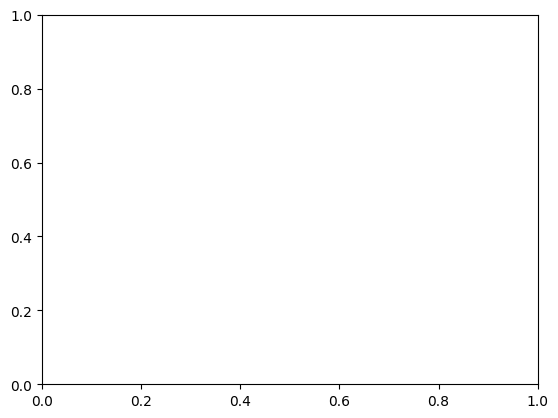

In [ ]:
# Plotting Train VS Loss ...
#RM...


epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='orange',label='Train')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()


In [ ]:
#Test set Working...

#A) Image Processing....

validation_set =  tf.keras.utils.image_dataset_from_directory(
       '/content/pest/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

#RM...


Found 450 files belonging to 9 classes.
['aphids', 'armyworm', 'beetle', 'bollworm', 'grasshopper', 'mites', 'mosquito', 'sawfly', 'stem_borer']


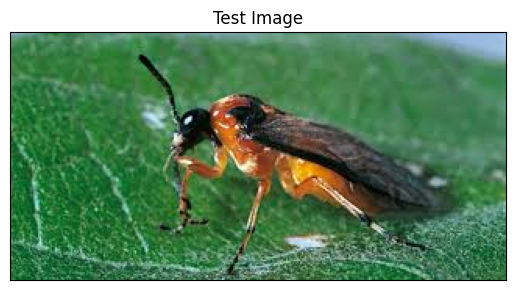

In [ ]:
#Test Image Visualization & checking the path is working or not....
#RM...

import numpy as np
import cv2
image_path = '/content/pest/test/sawfly/jpg_40.jpg'

dis_path="/content/pest/train/sawfly/jpg_32 - Copy (3).jpg"

# Reading an image in default mode...
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB

dis_img = cv2.imread(dis_path)
dis_img = cv2.cvtColor(dis_img,cv2.COLOR_BGR2RGB)

# Displaying the image with its correctness...
#RM...

plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[1.1398472e-29 1.4176908e-23 2.1177268e-30 1.2488394e-28 2.0118566e-16
  2.7259120e-24 1.2178533e-12 1.0000000e+00 8.1772217e-23]]
7


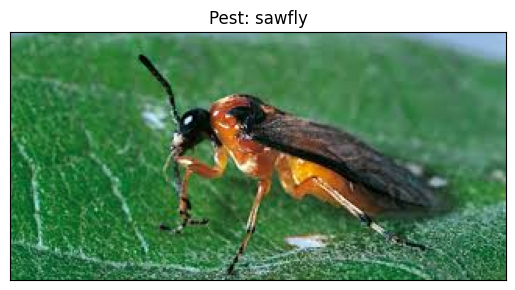

In [ ]:
# #Testing Model & insect prediction..
# #RM..

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch(array), as Model will only show predictions on array..or it will display error..
predictions = model.predict(input_arr)
print(predictions)


result_index = np.argmax(predictions) #Return index of max element
print(result_index)

#OUTPUT (OBJ:-1)...
# Displaying the disease prediction..

model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Pest: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

# #RM...


In [ ]:
#obj:2
#To identify the disease of the particular Pest's....

#RM...


import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load and preprocess the disease dataset
disease_training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/DATA2',  # Path to your disease dataset
    labels="inferred",
    label_mode="categorical",
    image_size=(128, 128),
    batch_size=32,
    shuffle=True
)


# Define the disease detection model
#CNN...

disease_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(disease_training_set.class_names), activation='softmax')  # Output layer with disease categories
])

# Compile the disease model
disease_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the disease model
disease_model.fit(disease_training_set, epochs=4)  # Adjust epochs as needed

# Save the trained disease model
disease_model.save('disease_model.h5')

#RM...

Found 494 files belonging to 9 classes.
Epoch 1/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 864ms/step - accuracy: 0.1723 - loss: 388.9794
Epoch 2/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 880ms/step - accuracy: 0.5412 - loss: 1.4328
Epoch 3/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8585 - loss: 0.5136
Epoch 4/4
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 815ms/step - accuracy: 0.9668 - loss: 0.1712


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


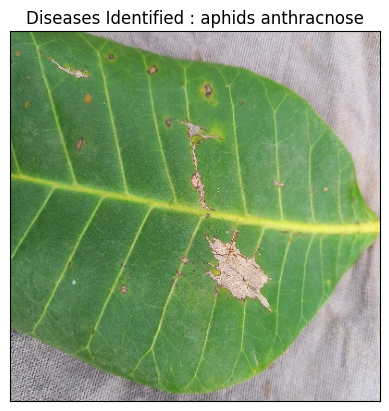

In [ ]:
# Function to predict and display disease results..
#RM...

def predict_disease(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])

    predictions = disease_model.predict(input_arr)
    result_index = np.argmax(predictions)
    disease_prediction = disease_training_set.class_names[result_index]

    plt.imshow(img)
    plt.title(f"Diseases Identified : {disease_prediction}")
    plt.xticks([])
    plt.yticks([])
    plt.show()

#Setting image path for disease detection from the model...

disease_image_path = '/content/DATA2/aphids anthracnose/anthracnose18_.jpg'
predict_disease(disease_image_path)

In [ ]:
#obj:3
#To identify the pesticides of the particular Pest's....

#RM...


import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


#Pesticides Recommendation model....

#a) For Aphids...

def recommend_pesticides_for_aphids(csv_file='/content/pesticides .csv'):

  try:
    # Load the pesticide data from the CSV file if try block could find the pest's...
    pesticide_data = pd.read_csv(csv_file)

    aphids_pesticides = pesticide_data[
        pesticide_data['Pest Name'].str.lower() == 'aphids'
    ]

    # Extract the pesticide names from the filtered rows...
    recommended_pesticides = aphids_pesticides['Most Commonly Used Pesticides'].tolist()

    # Print the recommendations...
    print("Recommended pesticides for Aphids:")
    for pesticide in recommended_pesticides:
      print(f"- {pesticide}")

    return recommended_pesticides

   #If file not found, return with error...


  except FileNotFoundError:
    print(f"Error: CSV file '{csv_file}' not found.")
    return []
  except KeyError as e:
    print(f"Error: CSV file does not have the expected column: {e}")
    return []

# Example for Aphids...
recommended_pesticides = recommend_pesticides_for_aphids()

#------------------------------------------------------------------------------------------#


#B) For Bollworm...

# def recommend_pesticides_for_bollworm(csv_file='/content/pesticides .csv'):

#   try:
#     # Load the pesticide data from the CSV file
#     pesticide_data = pd.read_csv(csv_file)

#     bollworm_pesticides = pesticide_data[
#         pesticide_data['Pest Name'].str.lower() == 'bollworm'
#     ]

#     # Extract the pesticide names from the filtered rows
#     recommended_pesticides = bollworm_pesticides['Most Commonly Used Pesticides'].tolist()

#     # Print the recommendations
#     print("Recommended pesticides for bollworm:")
#     for pesticide in recommended_pesticides:
#       print(f"- {pesticide}")

#     return recommended_pesticides

#   except FileNotFoundError:
#     print(f"Error: CSV file '{csv_file}' not found.")
#     return []
#   except KeyError as e:
#     print(f"Error: CSV file does not have the expected column: {e}")
#     return []

# # Example usage
# recommended_pesticides = recommend_pesticides_for_bollworm()

#------------------------------------------------------------------------------------------#


#C) For Grasshopper...

# def recommend_pesticides_for_grasshopper(csv_file='/content/pesticides .csv'):

#   try:
#     # Load the pesticide data from the CSV file
#     pesticide_data = pd.read_csv(csv_file)

#     grasshopper_pesticides = pesticide_data[
#         pesticide_data['Pest Name'].str.lower() == 'grasshopper'
#     ]

#     # Extract the pesticide names from the filtered rows
#     recommended_pesticides = grasshopper_pesticides['Most Commonly Used Pesticides'].tolist()

#     # Print the recommendations
#     print("Recommended pesticides for Grasshopper:")
#     for pesticide in recommended_pesticides:
#       print(f"- {pesticide}")

#     return recommended_pesticides

#   except FileNotFoundError:
#     print(f"Error: CSV file '{csv_file}' not found.")
#     return []
#   except KeyError as e:
#     print(f"Error: CSV file does not have the expected column: {e}")
#     return []

# # Example usage
# recommended_pesticides = recommend_pesticides_for_grasshopper()


#RM...
#END OF MINOR PROJECT...
#DATE: 14/12/2024..
#--------------------------------------------------------------------------------------------------------------------------------------------#












Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Recommended pesticides for Aphids:
- Imidacloprid, Acetamiprid, Thiamethoxam
